# Lets compare all of the different classifiers and try to identify the best one

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd .read_csv("Data/Breast_Cancer.csv")
display(dataset.head(), len(dataset))

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


683

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting into the training and the testing dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Each Model

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

### K nearest Neighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

### Support Vector Machine

In [9]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)

SVC()

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

## Getting conusion matrix and accuracy score for each Model

We will conpute the confusion matrix and a basic accuracy score for each classification method. We will also compyte and ROC curve and get its area under it and compare those later awell as display each models ROC curve


### Logistic Regression

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
y_pred = LR.predict(X_test)
LR_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(LR_cm)
print()
LR_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", LR_as)
LR_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", LR_roc)

Confusion Matrix
[[83  0]
 [ 3 51]]

accuracy Score ->  0.9781021897810219
ROC accuracy Score ->  0.9722222222222222


Model: ROC AUC=0.972


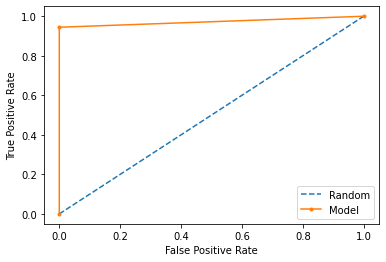

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### K nearest Neighbours

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KNN.predict(X_test)
KNN_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(KNN_cm)
print()
KNN_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", KNN_as)
KNN_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", KNN_roc)

Confusion Matrix
[[82  1]
 [ 3 51]]

accuracy Score ->  0.9708029197080292
ROC accuracy Score ->  0.96619812583668


Model: ROC AUC=0.966


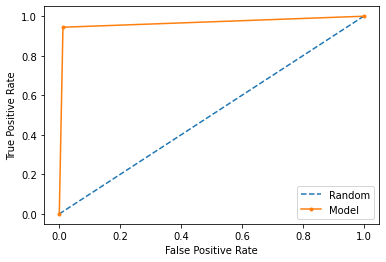

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Support Vector Machine

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVM.predict(X_test)
SVM_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(SVM_cm)
print()
SVM_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", SVM_as)
SVM_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", SVM_roc)

Confusion Matrix
[[83  0]
 [ 2 52]]

accuracy Score ->  0.9854014598540146
ROC accuracy Score ->  0.9814814814814814


Model: ROC AUC=0.981


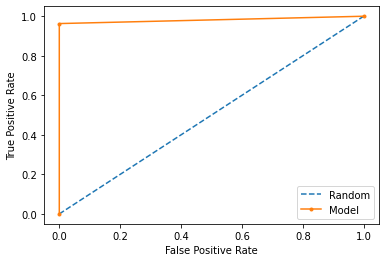

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Naive Bayes

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = NB.predict(X_test)
NB_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(NB_cm)
print()
NB_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", NB_as)
NB_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", NB_roc)

Confusion Matrix
[[81  2]
 [ 1 53]]

accuracy Score ->  0.9781021897810219
ROC accuracy Score ->  0.9786925479696564


Model: ROC AUC=0.979


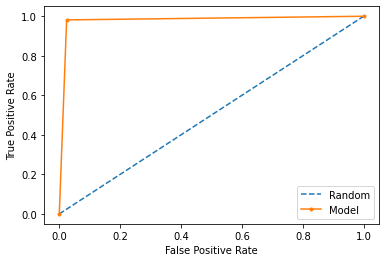

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Decision Tree Classifier

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = DTC.predict(X_test)
DTC_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(DTC_cm)
print()
DTC_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", DTC_as)
DTC_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", DTC_roc)

Confusion Matrix
[[82  1]
 [ 5 49]]

accuracy Score ->  0.9562043795620438
ROC accuracy Score ->  0.9476796073181616


Model: ROC AUC=0.948


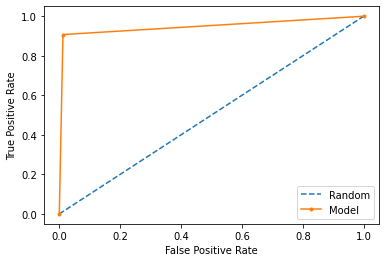

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Random Forest Classifier

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVM.predict(X_test)
RFC_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(RFC_cm)
print()
RFC_as = accuracy_score(y_test, y_pred)
print("accuracy Score -> ", RFC_as)
RFC_roc = roc_auc_score(y_test, y_pred)
print("ROC accuracy Score -> ", RFC_roc)

Confusion Matrix
[[83  0]
 [ 2 52]]

accuracy Score ->  0.9854014598540146
ROC accuracy Score ->  0.9814814814814814


Model: ROC AUC=0.981


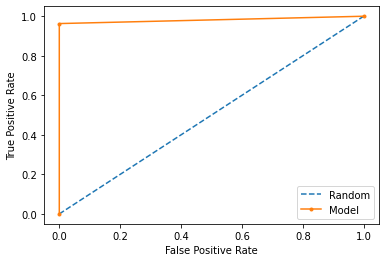

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Plotting results to compare models

### First the Accuracy Scores

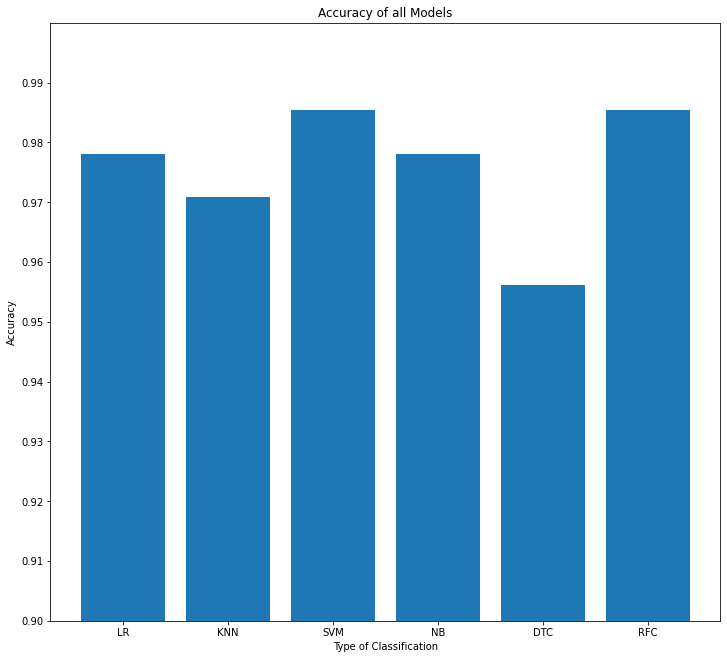

In [25]:
scores = [LR_as, KNN_as, SVM_as, NB_as, DTC_as, RFC_as]
Labels = ['LR', 'KNN', 'SVM', 'NB', 'DTC', 'RFC']

plt.figure(figsize = (12, 11))
plt.xticks(range(len(scores)), Labels)
plt.yticks(np.arange(0.9, 1, step=0.01))
plt.ylim(0.9,1)
plt.xlabel('Type of Classification')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.bar(range(len(scores)), scores) 
plt.show()

Looking at all of the models it seems that pureply of of accuracy score the ebst model to cheeose seems to be either Sipport Vector Machine or the random Forest Classifier

This abovepoint makes sense as those are the most detailed for classifiers that i have shown how to use and generally would give the best performance

We may see that another model would perform better after some parameter tuning or hyperparameter tuning, but with accuracy scores > 90% i am satisfied with these choices

### Secondly the Confusion matrixes as it seems like a good view

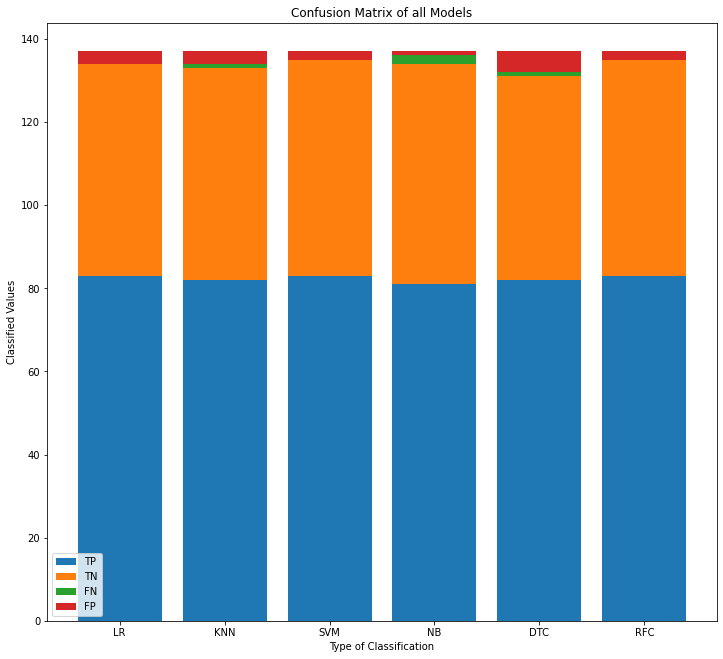

In [26]:
TP = [LR_cm[0,0], KNN_cm[0,0], SVM_cm[0,0], NB_cm[0,0], DTC_cm[0,0], RFC_cm[0,0]]
TN = [LR_cm[1,1], KNN_cm[1,1], SVM_cm[1,1], NB_cm[1,1], DTC_cm[1,1], RFC_cm[1,1]]
FN = [LR_cm[0,1], KNN_cm[0,1], SVM_cm[0,1], NB_cm[0,1], DTC_cm[0,1], RFC_cm[0,1]]
FP = [LR_cm[1,0], KNN_cm[1,0], SVM_cm[1,0], NB_cm[1,0], DTC_cm[1,0], RFC_cm[1,0]]
TP_TN = np.add(TP, TN)
TP_TN_FN = np.add(TP_TN, FN)

Labels = ['LR', 'KNN', 'SVM', 'NB', 'DTC', 'RFC']
ind = np.arange(6)

plt.figure(figsize = (12, 11))

plt.xticks(range(len(scores)), Labels)
plt.xlabel('Type of Classification')
plt.ylabel('Classified Values')
plt.title('Confusion Matrix of all Models')


# plt.bar(range(len(scores)), scores) 

plt.bar(ind, TP, label='TP')
plt.bar(ind, TN, bottom=TP, label='TN')
plt.bar(ind, FN, bottom=TP_TN, label='FN')
plt.bar(ind, FP, bottom=TP_TN_FN, label='FP')

plt.legend()

plt.show()


Looking at the Confusion Matrices we dont get much new info, but one thing that is interesting to note is that the Decision Tree Regression is getting quite a few False Posatives, which is worth noting due to the use case of this model (we dont want to tell somone they have cancer when they dont)

## Finally lets check the ROC accuracy Scores to see if they Agree

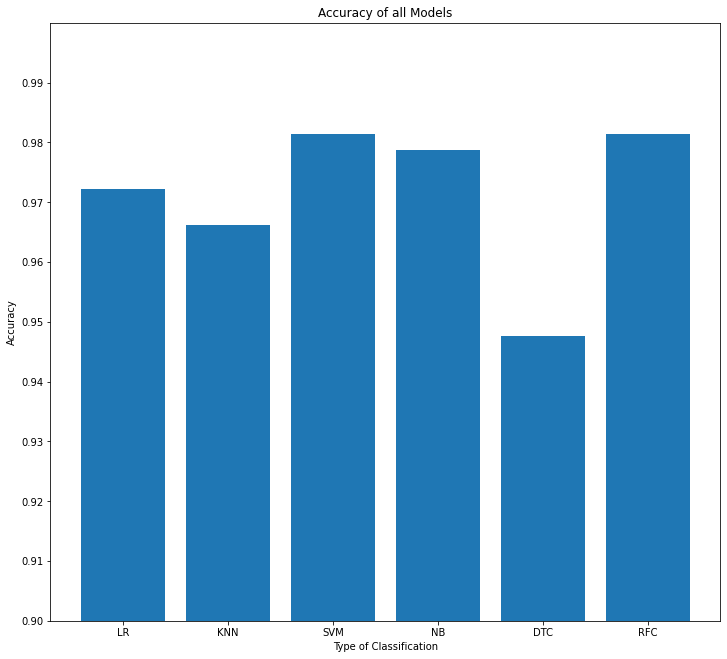

In [27]:
scores = [LR_roc, KNN_roc, SVM_roc, NB_roc, DTC_roc, RFC_roc]
Labels = ['LR', 'KNN', 'SVM', 'NB', 'DTC', 'RFC']

plt.figure(figsize = (12, 11))
plt.xticks(range(len(scores)), Labels)
plt.yticks(np.arange(0.9, 1, step=0.01))
plt.ylim(0.9,1)
plt.xlabel('Type of Classification')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.bar(range(len(scores)), scores) 
plt.show()

As we thought they agree with the accuracy score, worth noting tehy really penalise the DTC model 

## Final Thoughts

To be honest all of the models performed excellently, its making me think that they are somewhat overfitted to the data, this may be the case however its more than likely we just didnt have enough data and the data was to "clean" to be useful in showing real model capabilities.

The above being said it is still a great activity to familiarise oneself with the basics of ML model making